In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
panel_list = [fname for fname in os.listdir('../data/crc_raw/cBioPortal_files/') if 'data_gene_panel_' in fname]
len(panel_list)

8

In [3]:
data_path = '../data/crc_raw/cBioPortal_files/'
panel_dict = {}
for panel in panel_list:
    panel_dict[panel] = pd.read_csv(data_path + panel, sep='\t', skiprows=2)

In [4]:
col_dict = {}
for panel in panel_list:
    col_dict[panel] = panel_dict[panel].columns

In [5]:
#make a list of all the genes in all the panels
gene_list = []
for panel in panel_list:
    gene_list.extend(list(panel_dict[panel].columns))
gene_list = list(set(gene_list))
len(gene_list)

799

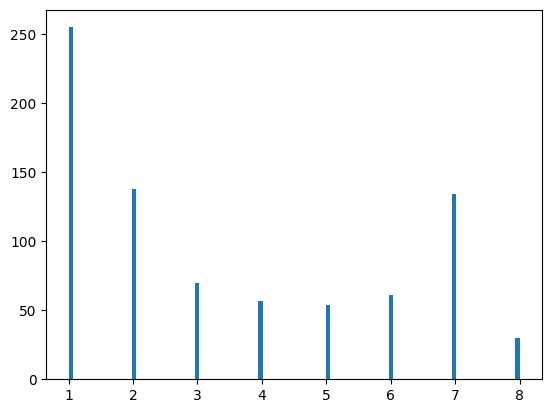

In [6]:
#count the number of times each gene appears in the panels
gene_count = {}
for gene in gene_list:
    gene_count[gene] = 0
for panel in panel_list:
    for gene in gene_list:
        if gene in list(panel_dict[panel].columns):
            gene_count[gene] += 1
#plot a histogram of the number of times each gene appears in the panels
import matplotlib.pyplot as plt
plt.hist(list(gene_count.values()), bins=100)
plt.show()

In [7]:
#get a list of the genes which occur in >=6 panels
gene_list = []
for gene in gene_count:
    if gene_count[gene] >= 6:
        gene_list.append(gene)
len(gene_list)

225

In [8]:
#write gene_list to txt file
with open('../data/crc_raw/cBioPortal_files/gene_list.txt', 'w') as f:
    for gene in gene_list:
        f.write(gene + '\n')

In [9]:
muts = pd.read_csv('../data/crc_raw/cBioPortal_files/data_mutations_extended.txt', sep='\t')
print(muts.shape)
muts.head()

(23225, 64)


/tmp/ipykernel_2684598/1285953628.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  muts = pd.read_csv('../data/crc_raw/cBioPortal_files/data_mutations_extended.txt', sep='\t')


,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Consequence,Variant_Classification,...,FILTER,Polyphen_Prediction,Polyphen_Score,SIFT_Prediction,SIFT_Score,SWISSPROT,n_depth,t_depth,Annotation_Status,mutationInCis_Flag
0,PALB2,79728,DFCI,GRCh37,16,23651599,23651599,+,intron_variant,Intron,...,PASS,NaN,NaN,NaN,NaN,NaN,NaN,113.0,SUCCESS,False
1,FBXW7,55294,DFCI,GRCh37,4,153258956,153258956,+,"missense_variant,splice_region_variant",Missense_Mutation,...,PASS,probably_damaging,0.993,deleterious,0.00,NaN,NaN,230.0,SUCCESS,False
2,EGFR,1956,DFCI,GRCh37,7,55221710,55221710,+,missense_variant,Missense_Mutation,...,PASS,possibly_damaging,0.882,deleterious,0.03,NaN,NaN,246.0,SUCCESS,False
3,PSMD13,5719,DFCI,GRCh37,11,247403,247403,+,missense_variant,Missense_Mutation,...,PASS,possibly_damaging,0.811,tolerated,0.08,NaN,NaN,301.0,SUCCESS,False
4,KRAS,3845,DFCI,GRCh37,12,25398284,25398284,+,missense_variant,Missense_Mutation,...,PASS,benign,0.303,deleterious,0.00,NaN,NaN,277.0,SUCCESS,False


In [10]:
muts.columns

Index(['Hugo_Symbol', 'Entrez_Gene_Id', 'Center', 'NCBI_Build', 'Chromosome',
       'Start_Position', 'End_Position', 'Strand', 'Consequence',
       'Variant_Classification', 'Variant_Type', 'Reference_Allele',
       'Tumor_Seq_Allele1', 'Tumor_Seq_Allele2', 'dbSNP_RS',
       'dbSNP_Val_Status', 'Tumor_Sample_Barcode',
       'Matched_Norm_Sample_Barcode', 'Match_Norm_Seq_Allele1',
       'Match_Norm_Seq_Allele2', 'Tumor_Validation_Allele1',
       'Tumor_Validation_Allele2', 'Match_Norm_Validation_Allele1',
       'Match_Norm_Validation_Allele2', 'Verification_Status',
       'Validation_Status', 'Mutation_Status', 'Sequencing_Phase',
       'Sequence_Source', 'Validation_Method', 'Score', 'BAM_File',
       'Sequencer', 't_ref_count', 't_alt_count', 'n_ref_count', 'n_alt_count',
       'HGVSc', 'HGVSp', 'HGVSp_Short', 'Transcript_ID', 'RefSeq',
       'Protein_position', 'Codons', 'Exon_Number', 'gnomAD_AF',
       'gnomAD_AFR_AF', 'gnomAD_AMR_AF', 'gnomAD_ASJ_AF', 'gnomAD_EAS_AF

In [11]:
samps = pd.read_csv('../data/crc_raw/cBioPortal_files/data_clinical_sample.txt', sep='\t')
samps.head()

,#Oncotree Code,Sample Type,Sequence Assay ID,Age at sequencing,Sample Identifier,Patient Identifier,Mismatch Repair (MMR) Testing at Time of Sample Acquisition,MSI-H test result at Time of Sample Acquisition,Microsatellite Instability (MSI) Testing at Time of Sample Acquisition,Positive PD-L1 Result at the Time of Sample Acquisition,PD-L1 Testing at Time of Sample Acquisition,Year of Next Generation Sequencing
0,#The OncoTree diagnosis code using the abbrevi...,"The type of sample (i.e., normal, primary, met...",Sequence Assay ID,Age at sequencing,A unique sample identifier.,Identifier to uniquely specify a patient.,Indicates whether any mismatch repair (MMR) te...,Indicates whether any Microsatellite Instabili...,Indicates whether any microsatellite instabili...,Indicates whether any PD-L1 testing on the pat...,Indicates whether any PD-L1 testing was report...,Year of Next Generation Sequencing
1,#STRING,STRING,STRING,NUMBER,STRING,STRING,STRING,STRING,STRING,STRING,STRING,STRING
2,#1,1,1,1,1,1,1,1,1,1,1,1
3,ONCOTREE_CODE,SAMPLE_TYPE_DETAILED,SEQ_ASSAY_ID,AGE_AT_SEQUENCING,SAMPLE_ID,PATIENT_ID,MMR_TESTING,MSI_HIGH_ANY,MSI_TESTING,PDL1_POSITIVE_ANY,PDL1_TESTING,CPT_SEQ_DATE
4,COADREAD,Metastasis site unspecified,DFCI-ONCOPANEL-3,53,GENIE-DFCI-000147-350443,GENIE-DFCI-000147,Yes,NaN,No,Yes,Yes,2017


In [12]:
panels = pd.read_csv('../data/crc_raw/CRC_2.0-public_clinical_data/cancer_panel_test_level_dataset.csv')
panels.head()

,cohort,record_id,institution,cpt_number,ca_seq,cpt_n_ca_seq,cpt_order_int,cpt_seq_date,dob_cpt_report_days,dob_cpt_report_mos,...,path_proc_cpt_rep_days,path_proc_cpt_rep_mos,path_proc_cpt_rep_yrs,path_proc_number,path_rep_number,cpt_genie_sample_id,cpt_oncotree_code,sample_type,cpt_seq_assay_id,release_version
0,CRC,GENIE-DFCI-000048,DFCI,1,0,1,22066,2015,22108,727.236842,...,394,12.960526,1.078713,1,2,GENIE-DFCI-000048-7508,COAD,Primary tumor,DFCI-ONCOPANEL-2,2.0-public
1,CRC,GENIE-DFCI-000147,DFCI,1,0,1,18731,2015,18775,617.598684,...,121,3.980263,0.331280,2,1,GENIE-DFCI-000147-6898,READ,Primary tumor,DFCI-ONCOPANEL-2,2.0-public
2,CRC,GENIE-DFCI-000147,DFCI,2,0,1,19476,2017,19488,641.052632,...,33,1.085526,0.090349,5,1,GENIE-DFCI-000147-350443,COADREAD,Metastasis site unspecified,DFCI-ONCOPANEL-3,2.0-public
3,CRC,GENIE-DFCI-000233,DFCI,1,2,1,20356,2015,20399,671.019737,...,2038,67.039474,5.579740,4,1,GENIE-DFCI-000233-7633,COAD,Metastasis site unspecified,DFCI-ONCOPANEL-2,2.0-public
4,CRC,GENIE-DFCI-000247,DFCI,1,1,1,23940,2016,23956,788.026316,...,597,19.638158,1.634497,1,1,GENIE-DFCI-000247-11259,READ,Primary tumor,DFCI-ONCOPANEL-2,2.0-public


In [13]:
panels.columns

Index(['cohort', 'record_id', 'institution', 'cpt_number', 'ca_seq',
       'cpt_n_ca_seq', 'cpt_order_int', 'cpt_seq_date', 'dob_cpt_report_days',
       'dob_cpt_report_mos', 'dob_cpt_report_yrs', 'cpt_report_post_death',
       'cpt_report_post_last_alive', 'dx_cpt_rep_days', 'dx_cpt_rep_mos',
       'dx_cpt_rep_yrs', 'dx_path_proc_cpt_days', 'dx_path_proc_cpt_mos',
       'dx_path_proc_cpt_yrs', 'path_proc_cpt_rep_days',
       'path_proc_cpt_rep_mos', 'path_proc_cpt_rep_yrs', 'path_proc_number',
       'path_rep_number', 'cpt_genie_sample_id', 'cpt_oncotree_code',
       'sample_type', 'cpt_seq_assay_id', 'release_version'],
      dtype='object')

In [14]:
#keep only the rows where 'Hugo_Symbol' is in gene_list
muts = muts[muts['Hugo_Symbol'].isin(gene_list)]
print(muts.shape)

(15612, 64)


In [15]:
mut_df = pd.DataFrame(columns=gene_list, index=muts['Tumor_Sample_Barcode'].unique())
print(mut_df.shape)

(1531, 225)


In [16]:
for i in range(muts.shape[0]):
    mut_df.loc[muts.iloc[i]['Tumor_Sample_Barcode'], muts.iloc[i]['Hugo_Symbol']] = 1
mut_df = mut_df.fillna(0)
mut_df.head()

,CDK4,CCND3,CDH1,CDK8,GNAS,PRKAR1A,MLH1,PNRC1,ETV1,TSC1,...,ROS1,DAXX,TSC2,RAD51C,KMT2D,ARID1A,AURKB,U2AF1,REL,BRCA1
GENIE-DFCI-002643-6598,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
GENIE-DFCI-008624-7126,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GENIE-DFCI-003423-6929,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GENIE-DFCI-007675-6942,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
GENIE-DFCI-008889-6970,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
mut_df.to_csv('../data/crc_mutpertreat.csv')

In [18]:
ib_out = pd.read_csv('../data/crc_ib_out.csv', index_col=0)
print(ib_out.shape)
ib_out.head()

(321, 5)


,record_id,institution,dx_drug_start_int_1,os_g_status,pfs_i_and_m_g_status
37,GENIE-DFCI-000971,DFCI,795,1,1.0
41,GENIE-DFCI-001038,DFCI,759,1,1.0
108,GENIE-DFCI-002507,DFCI,2142,1,1.0
129,GENIE-DFCI-002561,DFCI,1812,1,1.0
250,GENIE-DFCI-005003,DFCI,946,1,1.0


In [ ]:
muts = pd.read_csv('../data/')